# INNOMATICS INTERNSHIP HACKATHON
## Movie Recommendation System
## Submitted by:
### Jairaj Shetkar
### email: shetkarjairaj@gmail.com
### Mobile Number: +91 7773943531
### Address: Pune, Maharashtra - 411023

### Note: All the below steps has been performed in a sequence of the questions asked in the Hackathon!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Answer of Question 2

In [2]:
movies_df = pd.read_csv('movies.csv')

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
shape = movies_df.shape

In [5]:
print(shape)

(9742, 3)


### Answer of Question 3

In [6]:
ratings_df = pd.read_csv('ratings.csv')

In [7]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
shape = ratings_df.shape
print(shape)

(100836, 4)


### Answer of Question 4

In [9]:
unique_users = ratings_df['userId'].nunique()

In [10]:
print(unique_users)

610


### Answer of Question 5

In [11]:
movie_ratings_count = ratings_df.groupby('movieId')['rating'].count()

In [12]:
# let's find the movie with the maximum number of ratings:
max_rated_movie_id = movie_ratings_count.idxmax()

# store it in a variable!
max_rated_movie = movies_df.loc[movies_df['movieId'] == max_rated_movie_id, 'title'].values[0]

In [13]:
print("The Highes rated movie is:",max_rated_movie)

The Highes rated movie is: Forrest Gump (1994)


### Answer of Question 6

In [14]:
# Now lets import tags dataset
tags_df = pd.read_csv('tags.csv')

In [15]:
tags_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [16]:
tags_df.describe()

,userId,movieId,timestamp
count,3683.000000,3683.000000,3.683000e+03
mean,431.149335,27252.013576,1.320032e+09
std,158.472553,43490.558803,1.721025e+08
min,2.000000,1.000000,1.137179e+09
25%,424.000000,1262.500000,1.137521e+09
50%,474.000000,4454.000000,1.269833e+09
75%,477.000000,39263.000000,1.498457e+09
max,610.000000,193565.000000,1.537099e+09


In [17]:
tags_df.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [18]:
# Now find the id of Matrix movie
matrix_movie_id = movies_df.loc[movies_df['title'] == 'Matrix, The (1999)', 'movieId'].values[0]

In [19]:
# Select the tags for the specified movieId
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']

In [20]:
# Now let's locate the tags of Matrix movie in Tags Dataset
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]

In [21]:
# Extract and print the unique tags for "Matrix, The (1999)"
unique_tags = matrix_tags['tag'].unique()
print("Tags submitted by users for 'Matrix, The (1999)':")
for tag in unique_tags:
    print(tag)

Tags submitted by users for 'Matrix, The (1999)':
martial arts
sci-fi
alternate universe
philosophy
post apocalyptic


#### Therefore Correct Options are: alternate universe, Philosophy and post apocalyptic

### Answer of Question 7

In [22]:
terminator_movie_id = movies_df.loc[movies_df['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

In [23]:
# Filter ratings for the specific movieId
terminator_ratings = ratings_df[ratings_df['movieId'] == terminator_movie_id]

In [24]:
# Calculate the average user rating for "Terminator 2: Judgment Day (1991)"
average_rating = terminator_ratings['rating'].mean()

In [25]:
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


### Answer of Question 8

In [26]:
fight_club_movie_id = movies_df.loc[movies_df['title'] == 'Fight Club (1999)', 'movieId'].values[0]

In [27]:
# Filter ratings for the specific movieId
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]

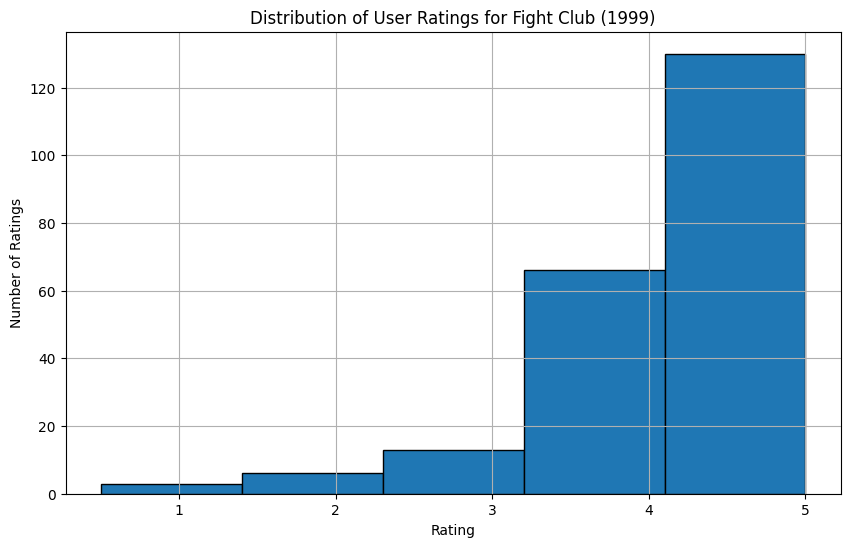

In [28]:
# Plotting of histogram
plt.figure(figsize=(10, 6))
plt.hist(fight_club_ratings['rating'], bins=5, edgecolor='black')
plt.title('Distribution of User Ratings for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()

### As we can observe the shape of histogram and conclude it is a left skewed distribution

### Performance of Mandatory operations:

### 1. Grouping the user ratings based on movieId, and applying aggregation operations like count and mean on ratings.

In [29]:
grouped_ratings = ratings_df.groupby('movieId').agg({'rating': ['count', 'mean']})

In [30]:
# let's Give it a new name
grouped_ratings.columns = ['rating_count', 'rating_mean']

In [31]:
# Load the "movies.csv" file into a DataFrame
movies_df = pd.read_csv('movies.csv')

#### Hence First operation Performed

### 2. Applying inner join on dataframe created from movies.csv and the grouped df from step 1.

In [32]:
merged_df = pd.merge(movies_df, grouped_ratings, on='movieId', how='inner')

### 3. Fetching movies having rating count grater than 50.

In [33]:
# Store this result in the new data frame
filtered_df = merged_df[merged_df['rating_count'] > 50]

In [34]:
print(filtered_df.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


### Answer of Question 9

In [35]:
# Find the movie with the highest average user rating
most_popular_movie = filtered_df.loc[filtered_df['rating_mean'].idxmax(), 'title']

In [36]:
print("The most popular movie based on average user ratings is:", most_popular_movie)

The most popular movie based on average user ratings is: Shawshank Redemption, The (1994)


### Answer of Question 10

In [37]:
top_movies = filtered_df.sort_values(by='rating_count', ascending=False).head(5)

In [38]:
print("Top 5 popular movies based on number of user ratings:")
print("")
print(top_movies[['movieId', 'title', 'rating_count']])

Top 5 popular movies based on number of user ratings:

      movieId                             title  rating_count
314       356               Forrest Gump (1994)           329
277       318  Shawshank Redemption, The (1994)           317
257       296               Pulp Fiction (1994)           307
510       593  Silence of the Lambs, The (1991)           279
1938     2571                Matrix, The (1999)           278


### Answer of Question 11

In [39]:
# Creating new data frame having only sci-fi movies
sci_fi_movies = filtered_df[filtered_df['genres'].str.contains('Sci-Fi')]

In [40]:
# Arranging in descending order 
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)

In [41]:
# Finding the third highest
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]['title']

In [42]:
print("The third most popular Sci-Fi movie is:", third_most_popular_sci_fi_movie)

The third most popular Sci-Fi movie is: Jurassic Park (1993)


## Web Scraping Script
### Tried my best to fill in the blanks with correct data... Since I have never done web scraping before!

In [43]:
import requests
from bs4 import BeautifulSoup

def scraper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    
    # Using requests.get to fetch the HTML content of the IMDb page
    response = requests.get(URL, headers=request_header)
    
    # Using BeautifulSoup to parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extracting the IMDb rating
    imdb_rating_tag = soup.find('span', itemprop='ratingValue')
    imdb_rating = imdb_rating_tag.text.strip() if imdb_rating_tag else np.nan
    
    return imdb_rating

# Example usage:
imdb_id = "1130884"  # Replace with the IMDb ID of the movie you want
rating = scraper(imdb_id)
print(f"The IMDb rating for the movie with IMDb ID {imdb_id} is: {rating}")

The IMDb rating for the movie with IMDb ID 1130884 is: nan


### Answer of Question 12
#### From The IMDB website we can easily get to know that "The Shawshank Redemption" movie has the Highest rating.

In [44]:
# Fetching the movieId for "The Shawshank Redemption (1994)"
shawshank_movie_id = movies_df.loc[movies_df['title'] == 'Shawshank Redemption, The (1994)', 'movieId'].values[0]

# Print the result
print("The movieId for 'The Shawshank Redemption (1994)' is:", shawshank_movie_id)

The movieId for 'The Shawshank Redemption (1994)' is: 318


In [45]:
movies_df.isin(["Interstellar"]).sum()

movieId    0
title      0
genres     0
dtype: int64

In [46]:
# Function to get IMDb rating using the scraper
def get_imdb_rating(movie_id):
    imdb_id = str(int(movie_id))
    return scraper(imdb_id)

In [ ]:
# Apply the function to get IMDb ratings for each movie
filtered_df['imdb_rating'] = filtered_df['movieId'].apply(get_imdb_rating)

In [ ]:
# Find the movieId with the highest IMDb rating
highest_rated_movie_id = filtered_df.loc[filtered_df['imdb_rating'].idxmax(), 'movieId']

### Note: Couln't find answer to last question since no experience of web scraping before and also it is not legal so never tried!...
## But very exited to learn once I join the Internship at your esteemed organization !

# Thank you!